## Question 1: Gaussian Quadrature
\begin{equation}
    \mathrm{erf}(3) = \frac{2}{\sqrt{\pi}} \int_0^3 e^{-t^2}\mathrm{d}t
\end{equation}

In [1]:
#PART A
# Andrew Hardy
#i) 
#import packages
import numpy as np
from scipy.special import erf
from gaussxw import gaussxw
import matplotlib.pyplot as plt


In [2]:
# defining variables taken from Q2.A from Lab 2, done by Brayden.
#define a function for Trapezoid rule 
def Trapezoid(function, i_N, f_a, f_b):
    """
    A function for performing numerical integration of the mathematical function 
    the trapezoid rule for N steps between a and b.
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_h = (f_b-f_a)/i_N #width of slices
    f_s = 0.5*function(f_a) + 0.5*function(f_b) #the constant terms in the series expansion defining the trapezoid rule as in equation 5.3 of Newman

    for j in range(1,i_N):
        f_s += function(f_a+j*f_h)
        
    f_integral = f_h*f_s
    return f_integral

#define a function for Simpson's rule
def Simpson(function, i_N, f_a, f_b):
    """
    A function for performing numerical integration of the mathematical function according to
    Simpson's rule for N steps between a and b.
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_h = (f_b-f_a)/i_N #width of slices
    f_s = function(f_a) + function(f_b) #the constant terms in the series expansion defining the trapezoid rule as in equation 5.3 of Newman
    
    for k in range(1,i_N,2): #loop over odd terms
        f_s += 4*function(f_a+k*f_h)
    for k in range(2,i_N,2): #loop over even terms
        f_s += 2*function(f_a+k*f_h)
        
    f_integral = f_h*f_s/3
    return f_integral
def Gaussian(function, i_N, f_a, f_b):
    """
    A function for performing numerical integration of the mathematical function according to
    Gaussian Quadrature for N steps between a and b. Basically ripped off Newman's gaussint.py
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_x,f_w = gaussxw(i_N)
    f_xp = 0.5*(f_b-f_a)*f_x + 0.5*(f_b+f_a)
    f_wp = 0.5*(f_b-f_a)*f_w

    # Perform the integration
    f_s = 0.0
    for k in range(i_N):
        f_s += f_wp[k]*function(f_xp[k])
    return f_s


In [3]:
#define function to be integrated
def errorfunction(f_t):
    return 2/np.sqrt(np.pi)*np.exp(-f_t**2)

In [4]:
i_length = int((1000-8)/2+1)
a_erf_trap = np.empty(i_length)
a_erf_simp = np.empty(i_length)
a_erf_gauss = np.empty(i_length)
a_N = np.empty(i_length)

t = np.empty(10000)
i = 8
j = 0
while i<=1000:
    a_N[j] = i
    a_erf_trap[j-8] = Trapezoid(errorfunction, i,0,3)
    a_erf_simp[j-8] = Simpson(errorfunction, i, 0,3)
    a_erf_gauss[j-8] = Gaussian(errorfunction, i, 0,3)
    i += 2
    j += 1

In [5]:
print('Trapezoid rule evaluation of erf(3) for 8<N<1000:')
#print(a_erf_trap)
print('Simpson rule evaluation of erf(3) for 8<N<1000:')
#print(a_erf_simp)
print('Gaussian quadrature evaluation of erf(3) for 8<N<1000:')
#print(a_erf_gauss)

Trapezoid rule evaluation of erf(3) for 8<N<1000:
Simpson rule evaluation of erf(3) for 8<N<1000:
Gaussian quadrature evaluation of erf(3) for 8<N<1000:


In [6]:
mn_trap = np.mean(a_erf_trap)
mn_simp = np.mean(a_erf_simp)
mn_gauss = np.mean(a_erf_gauss)
sd_trap = np.std(a_erf_trap)
sd_simp = np.std(a_erf_simp)
sd_gauss = np.std(a_erf_gauss)
print('Mean value for erf(3) with Trapezoid rule was {0} with standard deviation of {1}'.format(mn_trap, sd_trap))
print('Mean value for erf(3) with Simpson rule was {0} with standard deviation of {1}'.format(mn_simp, sd_simp))
print('Mean value for erf(3) with Gaussian quadrature was {0} with standard deviation of {1}'.format(mn_gauss, sd_gauss))

Mean value for erf(3) with Trapezoid rule was 0.9999778231853969 with standard deviation of 5.715079892949293e-07
Mean value for erf(3) with Simpson rule was 0.9999779012620776 with standard deviation of 9.939718061536657e-08
Mean value for erf(3) with Gaussian quadrature was 0.9999779095625705 with standard deviation of 1.3022291593934176e-09


In [7]:
#1b)
#get error of Gauss, trap, simp
a_N2 = 2*a_N
a_N1 = a_N//2
a_erf_gauss_2 = np.empty(len(a_N2))
a_erf_simp_1 = np.empty(len(a_N1))
a_erf_trap_1 = np.empty(len(a_N1))
for i in range(len(a_N2)):
    #gauss
    i_n = int(a_N2[i])
    a_erf_gauss_2[i] = Gaussian(errorfunction, i_n, 0,3)
    #trap
    i_n_p = int(a_N1[i])
    a_erf_trap_1[i] = Trapezoid(errorfunction, i_n, 0, 3)
    #simp
    a_erf_simp_1[i] = Simpson(errorfunction, i_n, 0, 3)
    
a_err_gauss = a_erf_gauss_2 - a_erf_gauss
a_err_trap = (a_erf_trap - a_erf_trap_1)/3
a_err_simp = (a_erf_simp - a_erf_simp_1)/15


In [33]:
print(a_err_gauss)

[-4.10782519e-15 -8.54871729e-15  8.65973959e-15 -4.99600361e-15
  0.00000000e+00 -5.55111512e-16  9.99200722e-16 -3.88578059e-15
 -2.44249065e-15  7.10542736e-15  4.10782519e-15  2.66453526e-15
  2.44249065e-15  1.77635684e-15  1.33226763e-15 -3.33066907e-15
 -1.66533454e-15 -3.88578059e-15 -7.77156117e-16 -1.66533454e-15
 -1.11022302e-16  4.44089210e-16  1.11022302e-16 -9.99200722e-16
 -4.44089210e-16 -1.11022302e-16  4.44089210e-15  3.88578059e-15
  3.66373598e-15  2.88657986e-15  2.99760217e-15  1.11022302e-15
  1.22124533e-15  8.88178420e-16  1.66533454e-15  2.33146835e-15
  5.55111512e-16 -1.55431223e-15 -3.55271368e-15 -3.21964677e-15
 -1.44328993e-15 -8.88178420e-16  1.11022302e-16 -1.99840144e-15
 -3.33066907e-16 -1.22124533e-15  1.11022302e-16 -1.33226763e-15
 -6.66133815e-16  1.66533454e-15 -5.55111512e-16 -1.77635684e-15
 -8.88178420e-16 -3.33066907e-16 -4.44089210e-16  3.33066907e-16
 -1.11022302e-16  1.11022302e-16  6.66133815e-16 -9.99200722e-16
  2.22044605e-16 -5.55111

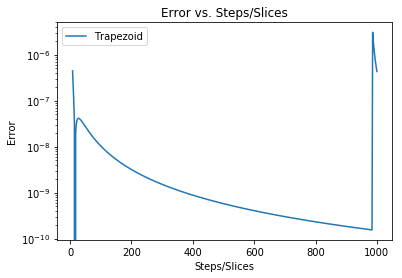

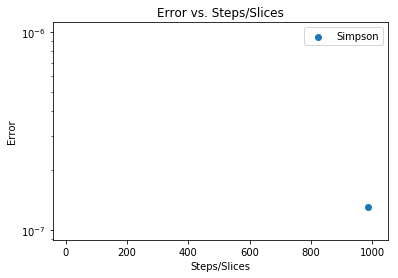

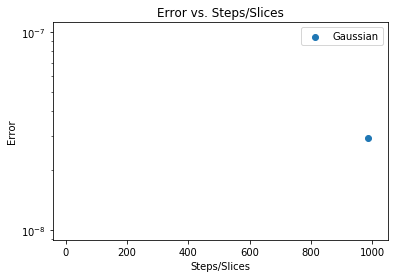

In [12]:
plt.figure()
plt.yscale('log')
plt.scatter(a_N, abs(a_err_trap), label = 'Trapezoid')
plt.xlabel('Steps/Slices')
plt.ylabel('Error')
plt.title('Error vs. Steps/Slices')
plt.legend()

plt.figure()
plt.yscale('log')
plt.scatter(a_N, abs(a_err_simp), label = 'Simpson')
plt.xlabel('Steps/Slices')
plt.ylabel('Error')
plt.title('Error vs. Steps/Slices')
plt.legend()

plt.figure()
plt.yscale('log')
plt.scatter(a_N, abs(a_err_gauss), label = 'Gaussian')
plt.xlabel('Steps/Slices')
plt.ylabel('Error')
plt.title('Error vs. Steps/Slices')
plt.legend()

In [9]:
print(np.mean(a_err_trap))
print(np.mean(a_err_simp))
print(np.mean(a_err_gauss))
print(np.std(a_err_trap))
print(np.std(a_err_simp))
print(np.std(a_err_gauss))

-2.1424204553055743e-08
-5.080091658613065e-10
-5.956925295088713e-11
1.8982643945649162e-07
6.6400311093287744e-09
1.3022291162320215e-09


In [24]:
t = np.log(abs(a_err_trap))
print(t)

[-14.63191492 -15.3788275  -16.17023483 -17.19767604         -inf
 -17.75922005 -17.30779615 -17.12425845 -17.04189481 -17.00990989
 -17.00651395 -17.02060167 -17.04588242 -17.07852873 -17.11608893
 -17.15693128 -17.19993736 -17.244323   -17.28952874 -17.33515007
 -17.38089166 -17.42653659 -17.47192511 -17.51693955 -17.56149377
 -17.60552533 -17.64898975 -17.69185634 -17.73410488 -17.77572322
 -17.81670557 -17.85705085 -17.89676173 -17.93584369 -17.97430434
 -18.01215296 -18.04940004 -18.08605694 -18.12213561 -18.15764841
 -18.19260795 -18.22702694 -18.26091813 -18.29429414 -18.32716755
 -18.35955064 -18.39145563 -18.42289432 -18.45387835 -18.48441901
 -18.51452748 -18.5442144  -18.57349018 -18.60236511 -18.63084899
 -18.65895143 -18.68668161 -18.71404864 -18.74106119 -18.76772765
 -18.79405635 -18.82005515 -18.84573185 -18.87109373 -18.89614815
 -18.92090223 -18.94536237 -18.96953544 -18.99342776 -19.01704551
 -19.04039463 -19.06348104 -19.0863103  -19.10888772 -19.131219
 -19.1533088

C:\Users\brayd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
